In [ ]:
# Data was garthered from Kaggle and unsplash.com
# Then the specified number of images was hand selected

!wget 'https://www.dropbox.com/scl/fo/exictz48hl0f2dgxnhxyu/AB5X7HYo_ailNXAkK1GImCo?rlkey=yeij64l7spheyc4k7krylvek1&st=na5tgkfe&dl=0'
!unzip 'AB5X7HYo_ailNXAkK1GImCo?rlkey=yeij64l7spheyc4k7krylvek1&st=na5tgkfe&dl=0'

--2024-10-31 15:11:51--  https://www.dropbox.com/scl/fo/exictz48hl0f2dgxnhxyu/AB5X7HYo_ailNXAkK1GImCo?rlkey=yeij64l7spheyc4k7krylvek1&st=na5tgkfe&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9da226cdb77b61f99295ec09ed.dl.dropboxusercontent.com/zip_download_get/CA7LlHLk_u-qdQzFdsj9OgWZq81ucCl7w91ydbyrARPCQaMX6o9QY5BvMssaAqjgxTHTDXVrpLQUmHBf5J8s4PSMGD4Sk7U0MkTpYr6EenY1ag# [following]
--2024-10-31 15:11:53--  https://uc9da226cdb77b61f99295ec09ed.dl.dropboxusercontent.com/zip_download_get/CA7LlHLk_u-qdQzFdsj9OgWZq81ucCl7w91ydbyrARPCQaMX6o9QY5BvMssaAqjgxTHTDXVrpLQUmHBf5J8s4PSMGD4Sk7U0MkTpYr6EenY1ag
Resolving uc9da226cdb77b61f99295ec09ed.dl.dropboxusercontent.com (uc9da226cdb77b61f99295ec09ed.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc9da226cdb77b61f9929

In [ ]:
import os
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Data Cleansing: Function to safely load images with error handling
def load_images_from_folder(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            try:
                img = Image.open(file_path)
                image_list.append(img)
            except (IOError) as e:
                print(f"Error loading image {filename}: {e}")
    return image_list

# Load the classes to lists with error handling for corrupted images
books_orig_size = load_images_from_folder('books')
shoes_orig_size = load_images_from_folder('shoes')
chairs_orig_size = load_images_from_folder('chairs')
fridges_orig_size = load_images_from_folder('fridges')
tables_orig_size = load_images_from_folder('tables')


Error loading image Intentional_error.txt: cannot identify image file '/content/books/Intentional_error.txt'


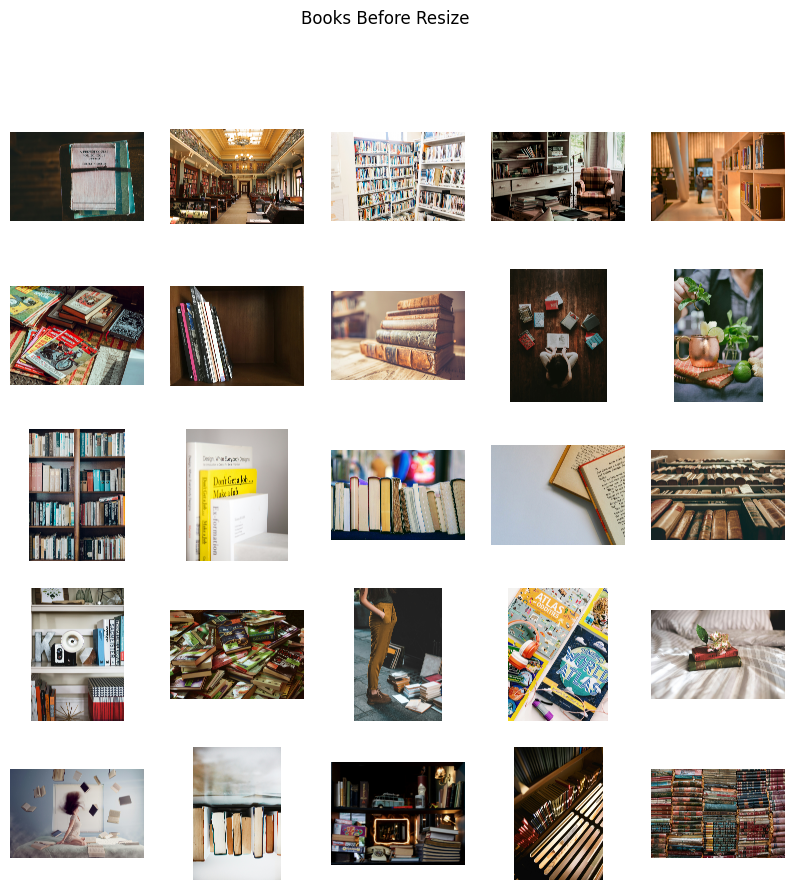

In [ ]:
def display_images_from_list(images, title, labels=None):
    if labels:
        combined = list(zip(images, labels))
        random.shuffle(combined)
        images, labels = zip(*combined)
    else:
        labels = [None] * len(images)

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.suptitle(title)

    for i, (ax, img) in enumerate(zip(axes.flatten(), images[:25])):
        ax.imshow(img)
        if labels:
            ax.set_title(labels[i], fontsize=8)
        ax.axis('off')

    plt.show()

display_images_from_list(books_orig_size, 'Books Before Resize')

In [ ]:
def Img_Resize(image_list, image_type, output_size=(256, 256)):
    # New size of images
    output_size = (256, 256)
    # Labels for classes
    type_dict = {'book': 'book', 'chair': 'furniture', 'table': 'furniture', 'fridge': 'furniture', 'shoe': "shoe"}
    labels = {f"{image_type}_{i}": type_dict[image_type] for i in range(1, len(image_list) + 1)}
    resized_images = []

    for img in image_list:
        try:
            resized_img = img.resize(output_size)
            resized_images.append(resized_img)
        except Exception as e:
            print(f"Error resizing image: {e}")

    return resized_images, labels

In [ ]:
books, books_labels = Img_Resize(books_orig_size, 'book')
books, books_labels = books[:50], dict(itertools.islice(books_labels.items(), 50))

shoes, shoes_labels = Img_Resize(shoes_orig_size, 'shoe')
shoes, shoes_labels = shoes[:50], dict(itertools.islice(shoes_labels.items(), 50))

chairs, chairs_labels = Img_Resize(chairs_orig_size, 'chair')
chairs, chairs_labels = chairs[:17], dict(itertools.islice(chairs_labels.items(), 17))

fridges, fridges_labels = Img_Resize(fridges_orig_size, 'fridge')
fridges, fridges_labels = fridges[:16], dict(itertools.islice(fridges_labels.items(), 16))

tables, tables_labels = Img_Resize(tables_orig_size, 'table')
tables, tables_labels = tables[:17], dict(itertools.islice(tables_labels.items(), 17))

In [ ]:
print(shoes_labels)

{'shoe_1': 'shoe', 'shoe_2': 'shoe', 'shoe_3': 'shoe', 'shoe_4': 'shoe', 'shoe_5': 'shoe', 'shoe_6': 'shoe', 'shoe_7': 'shoe', 'shoe_8': 'shoe', 'shoe_9': 'shoe', 'shoe_10': 'shoe', 'shoe_11': 'shoe', 'shoe_12': 'shoe', 'shoe_13': 'shoe', 'shoe_14': 'shoe', 'shoe_15': 'shoe', 'shoe_16': 'shoe', 'shoe_17': 'shoe', 'shoe_18': 'shoe', 'shoe_19': 'shoe', 'shoe_20': 'shoe', 'shoe_21': 'shoe', 'shoe_22': 'shoe', 'shoe_23': 'shoe', 'shoe_24': 'shoe', 'shoe_25': 'shoe', 'shoe_26': 'shoe', 'shoe_27': 'shoe', 'shoe_28': 'shoe', 'shoe_29': 'shoe', 'shoe_30': 'shoe', 'shoe_31': 'shoe', 'shoe_32': 'shoe', 'shoe_33': 'shoe', 'shoe_34': 'shoe', 'shoe_35': 'shoe', 'shoe_36': 'shoe', 'shoe_37': 'shoe', 'shoe_38': 'shoe', 'shoe_39': 'shoe', 'shoe_40': 'shoe', 'shoe_41': 'shoe', 'shoe_42': 'shoe', 'shoe_43': 'shoe', 'shoe_44': 'shoe', 'shoe_45': 'shoe', 'shoe_46': 'shoe', 'shoe_47': 'shoe', 'shoe_48': 'shoe', 'shoe_49': 'shoe', 'shoe_50': 'shoe'}


In [ ]:
# furniture list is a combination of chairs, fridges and tables
furniture = chairs + fridges + tables
furniture_labels = {}
furniture_labels.update(chairs_labels)
furniture_labels.update(fridges_labels)
furniture_labels.update(tables_labels)

In [ ]:
print(furniture_labels)

{'chair_1': 'furniture', 'chair_2': 'furniture', 'chair_3': 'furniture', 'chair_4': 'furniture', 'chair_5': 'furniture', 'chair_6': 'furniture', 'chair_7': 'furniture', 'chair_8': 'furniture', 'chair_9': 'furniture', 'chair_10': 'furniture', 'chair_11': 'furniture', 'chair_12': 'furniture', 'chair_13': 'furniture', 'chair_14': 'furniture', 'chair_15': 'furniture', 'chair_16': 'furniture', 'chair_17': 'furniture', 'fridge_1': 'furniture', 'fridge_2': 'furniture', 'fridge_3': 'furniture', 'fridge_4': 'furniture', 'fridge_5': 'furniture', 'fridge_6': 'furniture', 'fridge_7': 'furniture', 'fridge_8': 'furniture', 'fridge_9': 'furniture', 'fridge_10': 'furniture', 'fridge_11': 'furniture', 'fridge_12': 'furniture', 'fridge_13': 'furniture', 'fridge_14': 'furniture', 'fridge_15': 'furniture', 'fridge_16': 'furniture', 'table_1': 'furniture', 'table_2': 'furniture', 'table_3': 'furniture', 'table_4': 'furniture', 'table_5': 'furniture', 'table_6': 'furniture', 'table_7': 'furniture', 'table_8

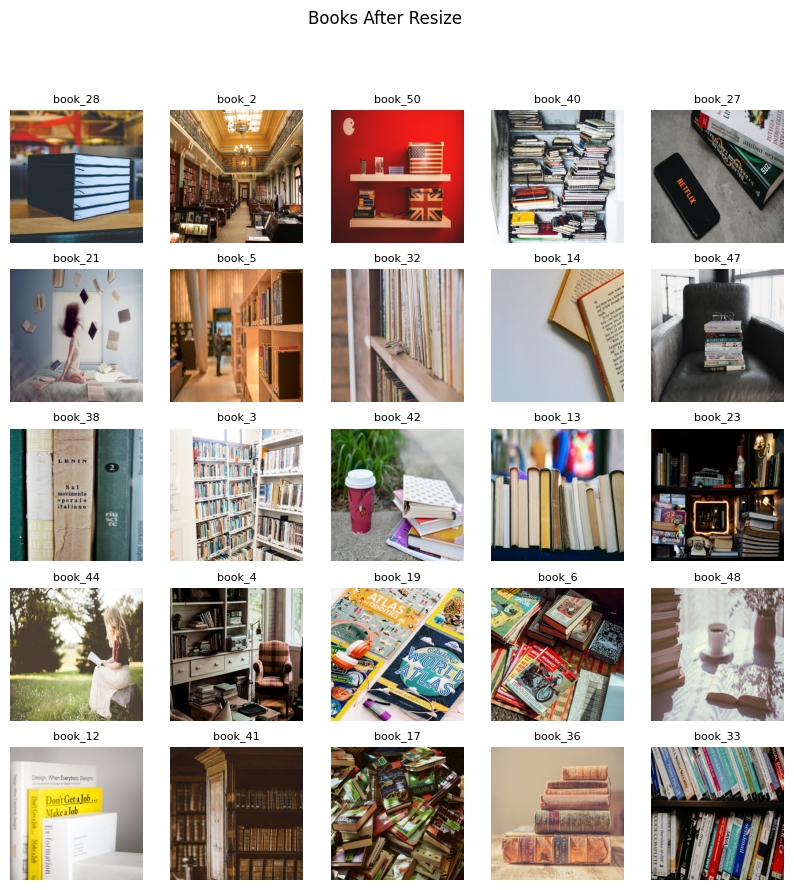

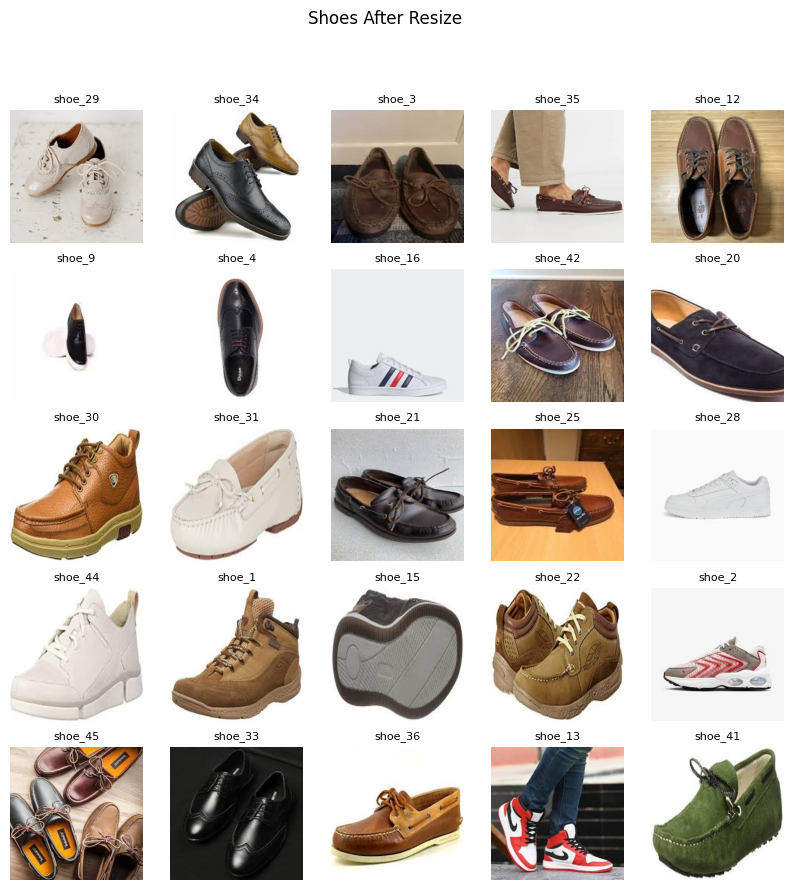

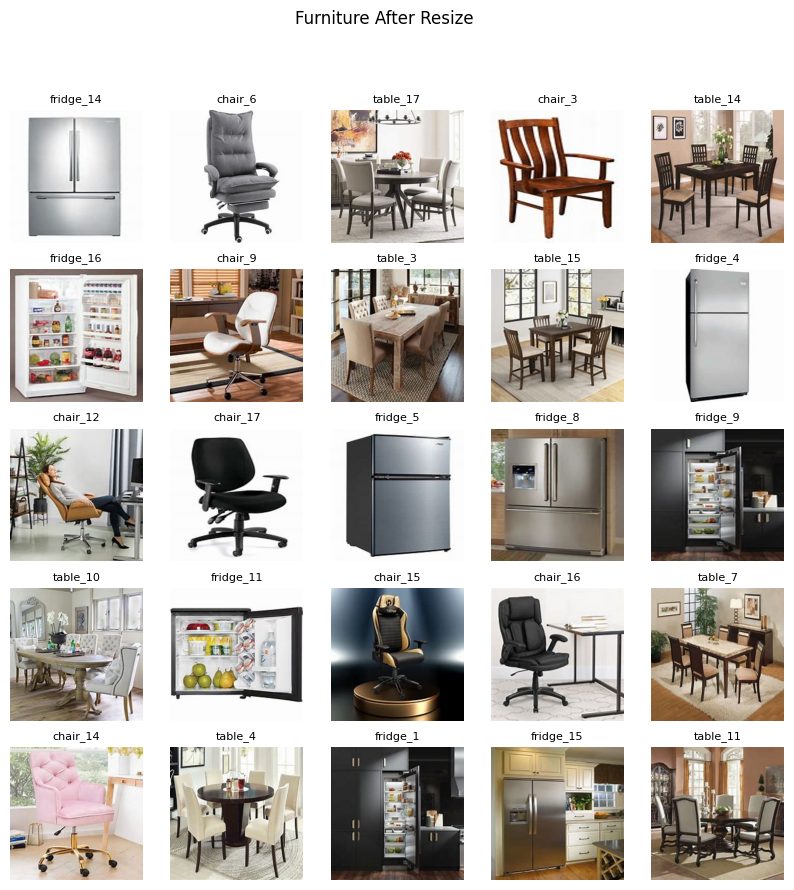

In [ ]:
display_images_from_list(books, 'Books After Resize', books_labels)
display_images_from_list(shoes, 'Shoes After Resize', shoes_labels)
display_images_from_list(furniture, 'Furniture After Resize', furniture_labels)


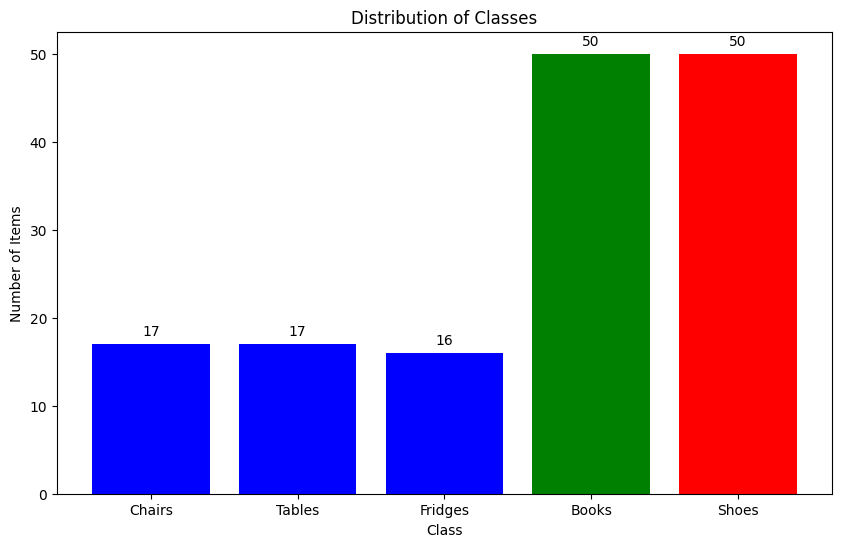

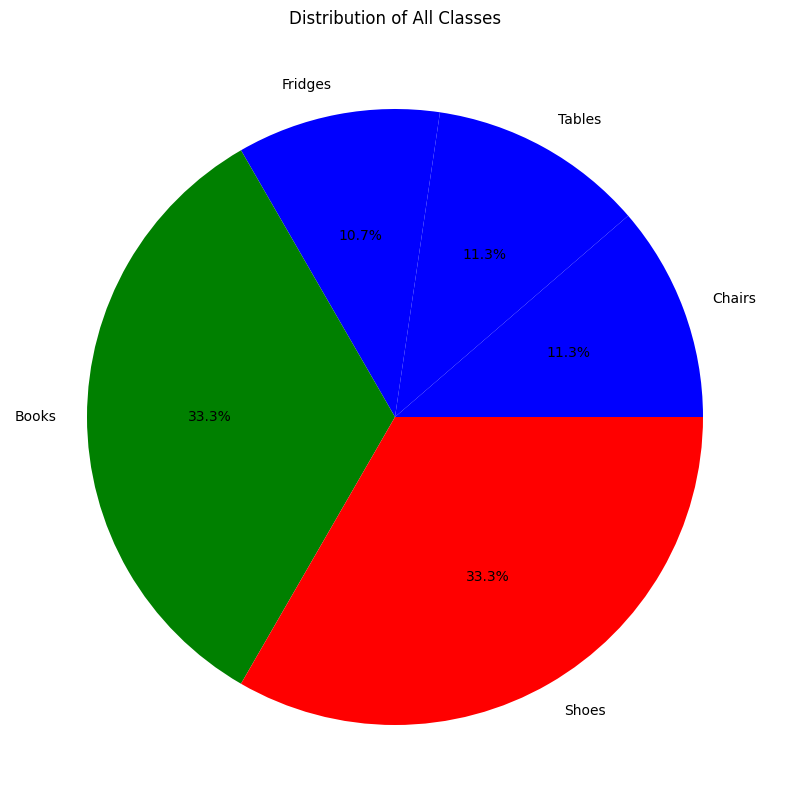

In [ ]:
# Count the number of items in each class
# Combine all class counts for a single pie chart
all_counts = {
    'Chairs': len(chairs),
    'Tables': len(tables),
    'Fridges': len(fridges),
    'Books': len(books),
    'Shoes': len(shoes)
}

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(all_counts.keys(), all_counts.values(), color=['blue', 'blue', 'blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(all_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes')
plt.figure(figsize=(10, 10))
plt.pie(all_counts.values(), labels=all_counts.keys(), autopct='%1.1f%%', colors=['blue', 'blue', 'blue', 'green', 'red'])
plt.title('Distribution of All Classes')
plt.show()

Training set size: 90
Validation set size: 30
Test set size: 30


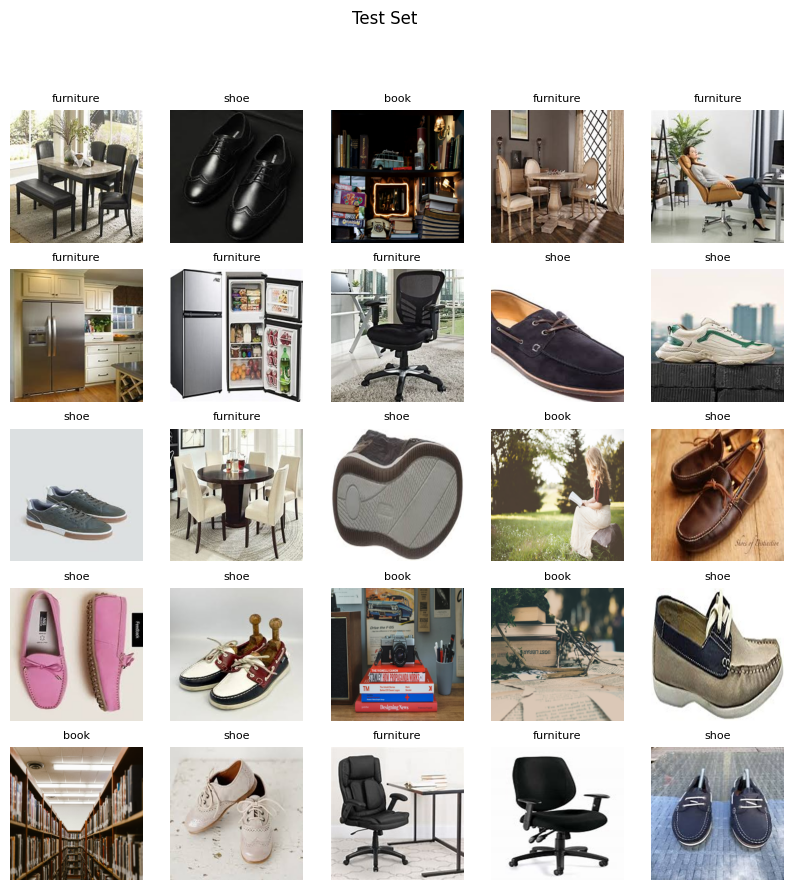

In [ ]:
# Combine all images and labels
all_images = furniture + shoes + books
all_labels_list = list(furniture_labels.values()) + list(shoes_labels.values()) + list(books_labels.values())

# Split the data into train, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(all_images, all_labels_list, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(train_images)}")
print(f"Validation set size: {len(val_images)}")
print(f"Test set size: {len(test_images)}")

#display_images_from_list(test_images, 'Test Set', test_labels)

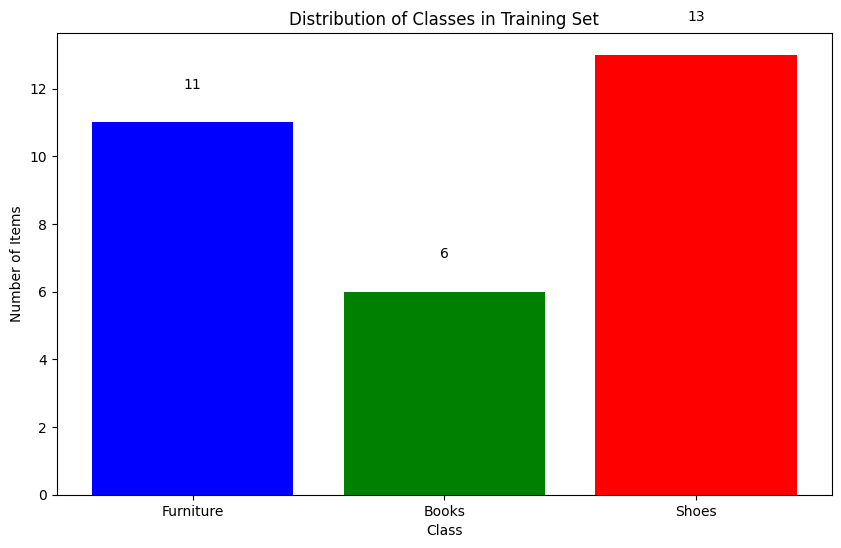

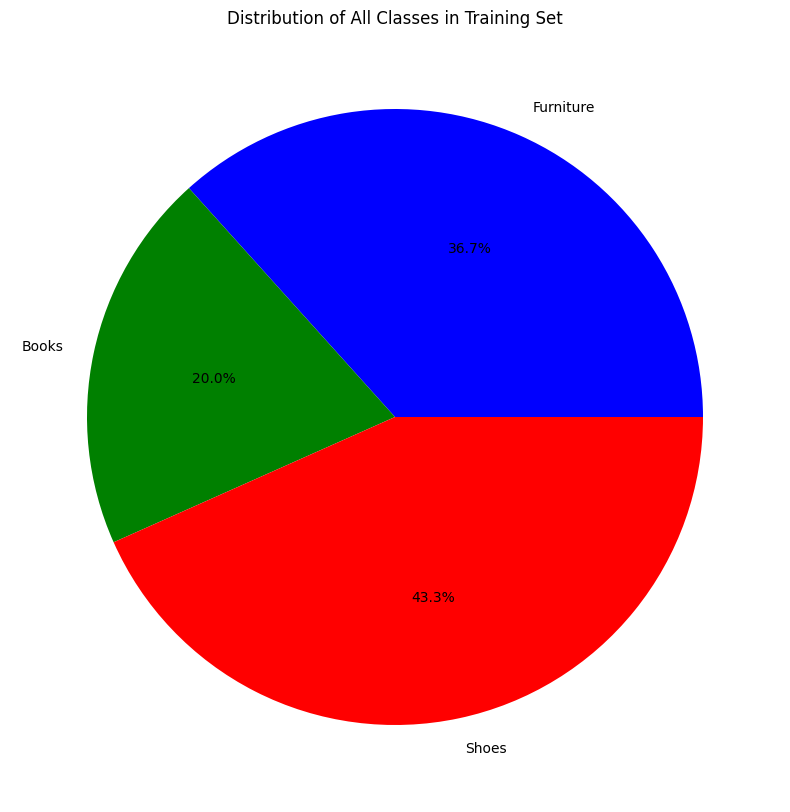

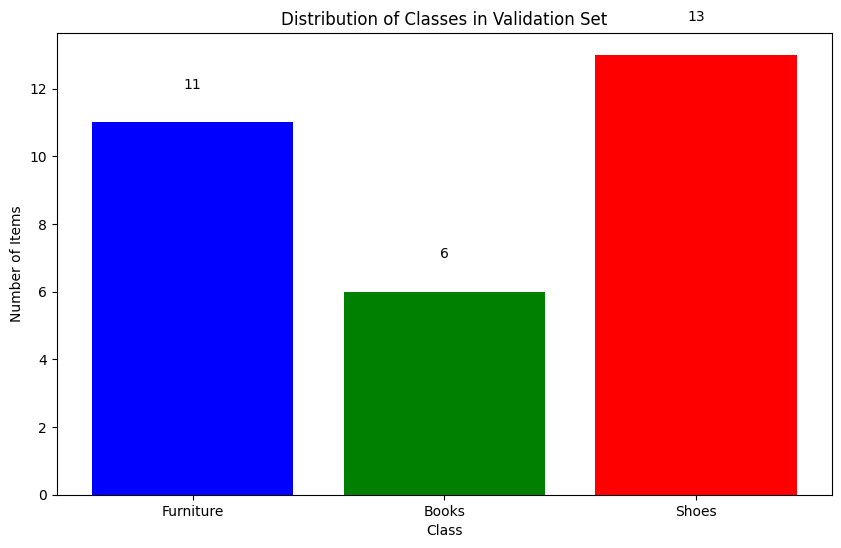

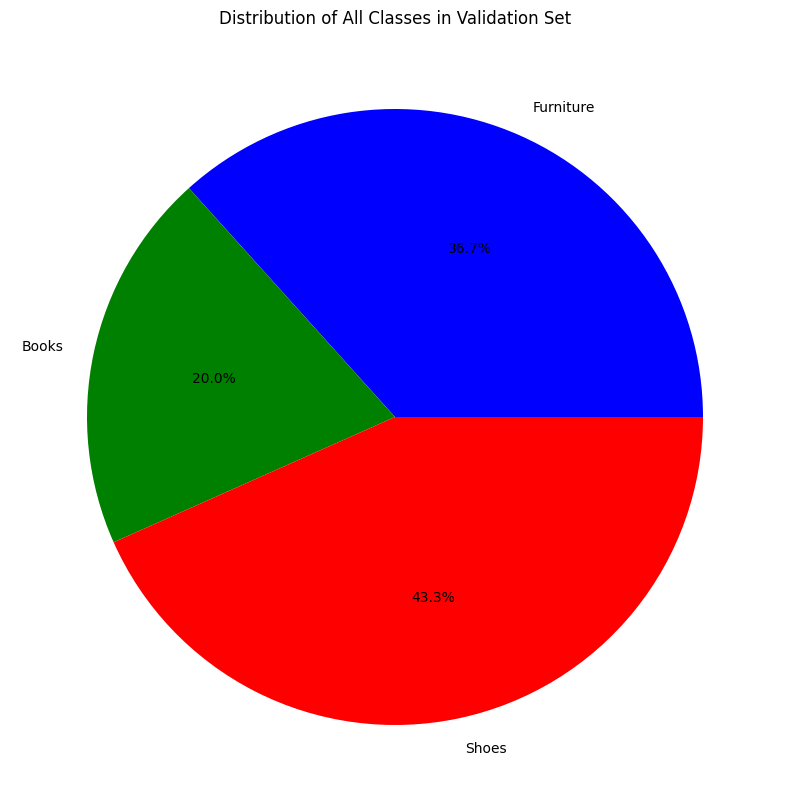

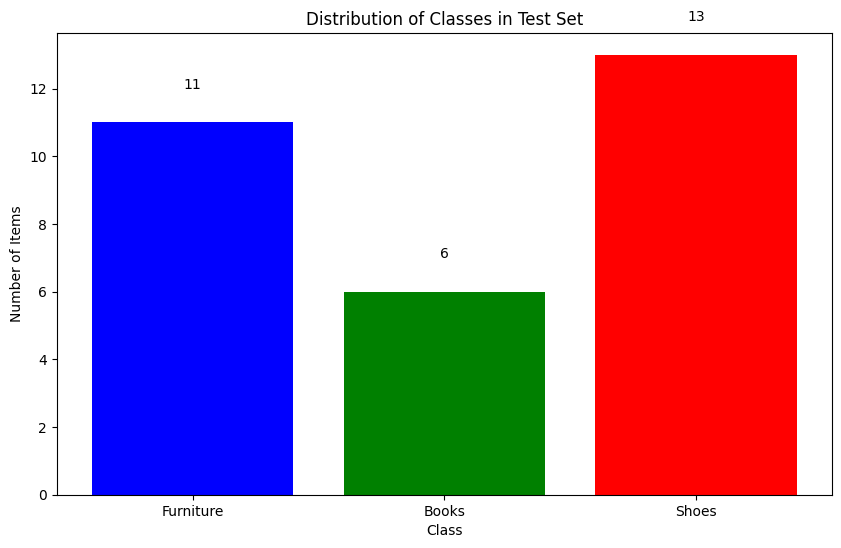

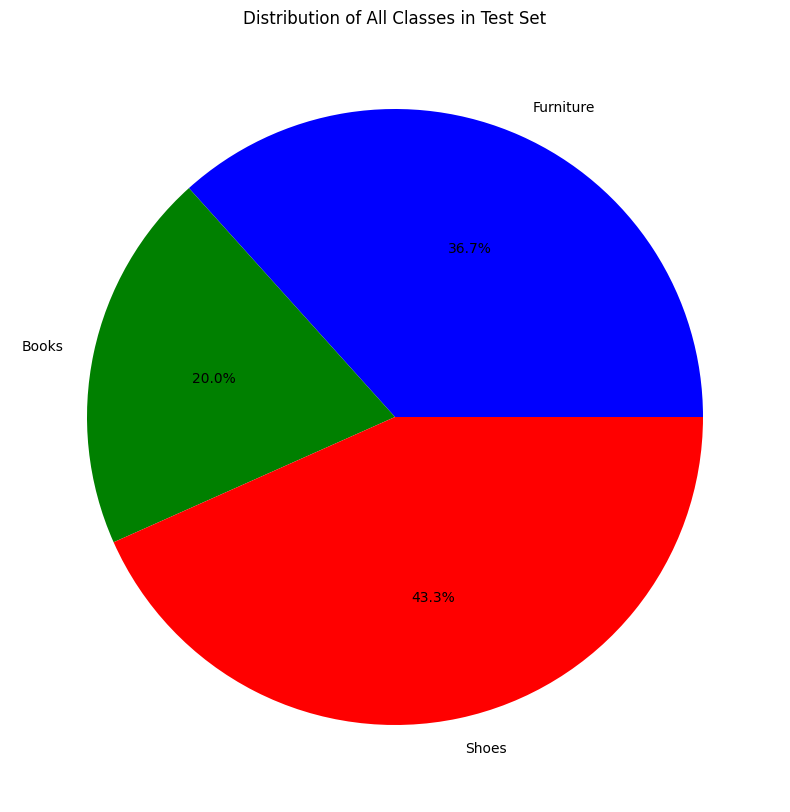

In [ ]:
train_counts = {
    'Furniture': sum(1 for label in test_labels if label == 'furniture'),
    'Books': sum(1 for label in test_labels if label == 'book'),
    'Shoes': sum(1 for label in test_labels if label == 'shoe')
}

# Plot the distribution for the training set
plt.figure(figsize=(10, 6))
plt.bar(train_counts.keys(), train_counts.values(), color=['blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(train_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes in Training Set')
plt.figure(figsize=(10, 10))
plt.pie(train_counts.values(), labels=train_counts.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribution of All Classes in Training Set')
plt.show()

# Count the number of items in each class in the validation set
val_counts = {
    'Furniture': sum(1 for label in test_labels if label == 'furniture'),
    'Books': sum(1 for label in test_labels if label == 'book'),
    'Shoes': sum(1 for label in test_labels if label == 'shoe')
}

# Plot the distribution for the validation set
plt.figure(figsize=(10, 6))
plt.bar(val_counts.keys(), val_counts.values(), color=['blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(val_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes in Validation Set')
plt.figure(figsize=(10, 10))
plt.pie(val_counts.values(), labels=val_counts.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribution of All Classes in Validation Set')
plt.show()

# Count the number of items in each class in the test set
test_counts = {
    'Furniture': sum(1 for label in test_labels if label == 'furniture'),
    'Books': sum(1 for label in test_labels if label == 'book'),
    'Shoes': sum(1 for label in test_labels if label == 'shoe')
}

# Plot the distribution for the test set
plt.figure(figsize=(10, 6))
plt.bar(test_counts.keys(), test_counts.values(), color=['blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(test_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes in Test Set')
plt.figure(figsize=(10, 10))
plt.pie(test_counts.values(), labels=test_counts.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribution of All Classes in Test Set')
plt.show()

##Baseline models

###Random choosing

In [ ]:
# Define the classes
classes = list(set(val_labels))
num_samples = len(train_images)

# Function to create random baseline predictions
def random_baseline_predictions(num_samples):
    """
    Generate random predictions for a given number of samples.

    Parameters:
    num_samples (int): Number of predictions to generate.

    Returns:
    list: Randomly selected classes for each sample.
    """
    return [random.choice(classes) for _ in range(num_samples)]

Accuracy: 0.36


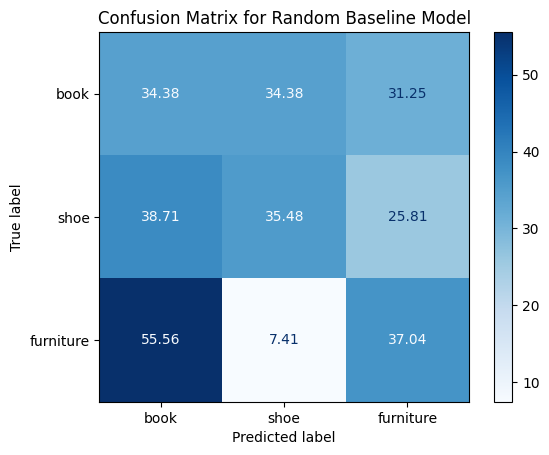

In [ ]:
# Example usage
true_labels = train_labels
random_predictions = random_baseline_predictions(num_samples)

# Convert the random predictions and true labels to arrays for evaluation
random_predictions_array = np.array(random_predictions)
true_labels_array = np.array(true_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels_array, random_predictions_array)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the confusion matrix
# Generate and display the confusion matrix with percentages
conf_matrix = confusion_matrix(true_labels_array, random_predictions_array, labels=classes)
conf_matrix_percent = np.nan_to_num(conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percent, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Confusion Matrix for Random Baseline Model')
plt.show()

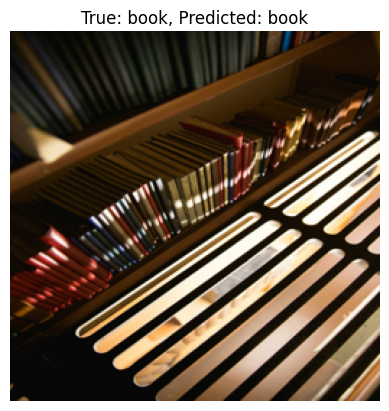

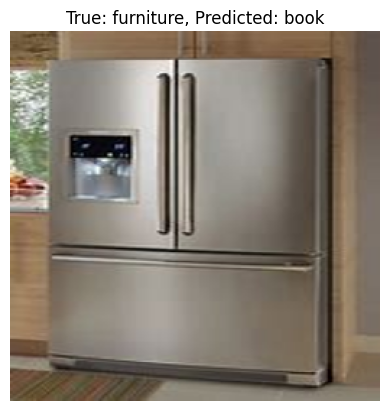

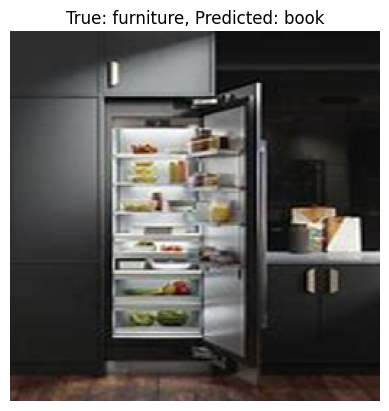

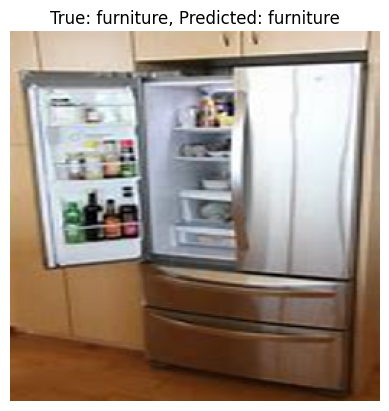

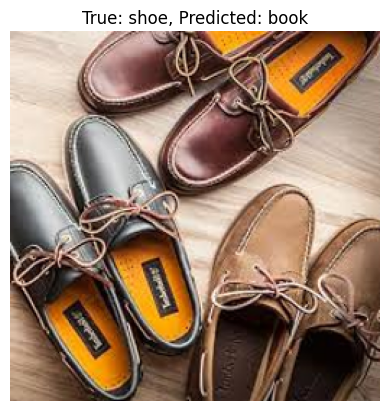

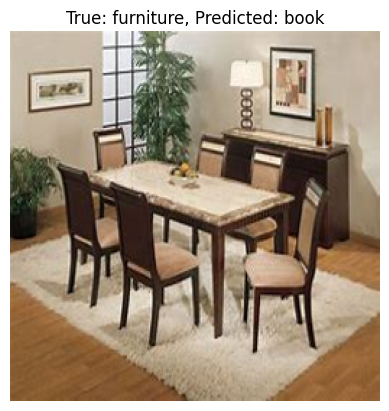

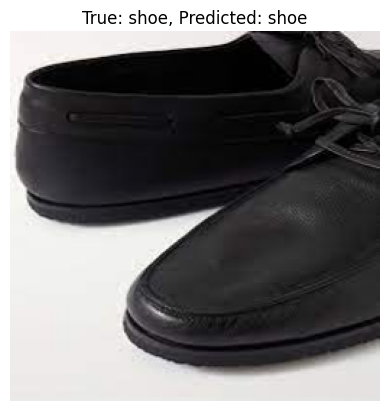

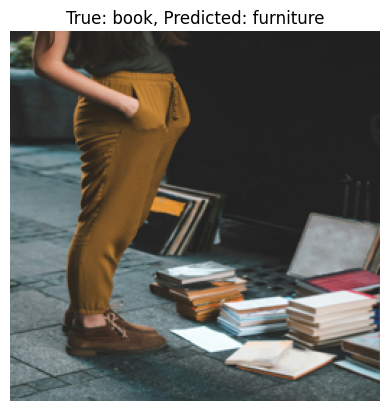

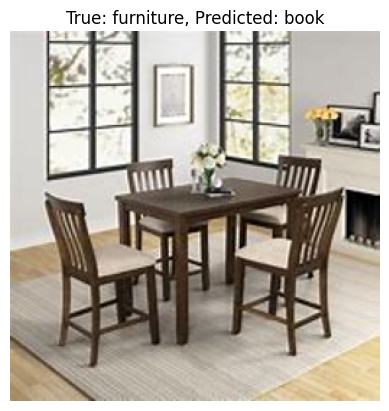

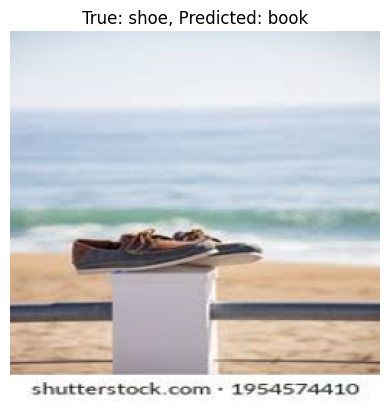

In [ ]:
# Display some example images with predicted and true labels (mock images for demonstration)
def display_predictions(num_samples_to_show=10):
    """
    Display sample predictions with true labels.

    Parameters:
    num_samples_to_show (int): Number of samples to display.
    """
    for i in range(num_samples_to_show):
        true_label = true_labels[i]
        predicted_label = random_predictions[i]
        # Mock image (in a real scenario, replace this with actual image data)
        image = train_images[i]
        plt.imshow(image)
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

# Display some sample predictions
display_predictions()

###Baseline neural network model

In [ ]:
# Baseline Convolutional Neural Network model
def create_baseline_cnn(input_shape=(256, 256, 3), num_classes=3):
    """
    Create a simple baseline CNN model.

    Parameters:
    input_shape (tuple): Shape of the input images.
    num_classes (int): Number of output classes.

    Returns:
    model: A compiled CNN model.
    """
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and summarize the baseline CNN model
baseline_cnn = create_baseline_cnn()
#baseline_cnn.summary()

# Convert true labels to categorical for training (in a real scenario, use actual labels)
true_labels_categorical = to_categorical([classes.index(label) for label in true_labels], num_classes=len(classes))

# Convert images to numpy array for training
train_images = np.array(train_images)

In [ ]:
# Train the baseline CNN model (for demonstration purposes, using mock data)
baseline_cnn.fit(train_images, true_labels_categorical, epochs=10, batch_size=16)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.3428 - loss: 2738.1785
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.3612 - loss: 159.2840
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.4929 - loss: 1.8130
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8580 - loss: 0.5273
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8841 - loss: 0.3771
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8906 - loss: 0.2357
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9098 - loss: 0.2014
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9077 - loss: 0.1634
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.9683 - loss: 0.1294
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9650 - loss: 0.0874


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Trained Model Accuracy: 0.10


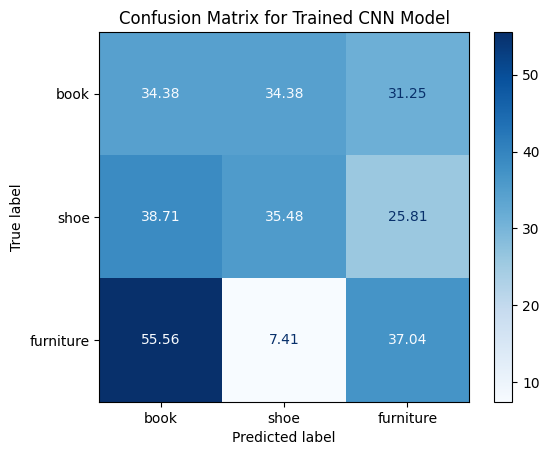

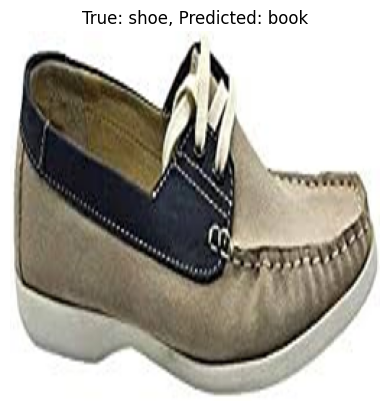

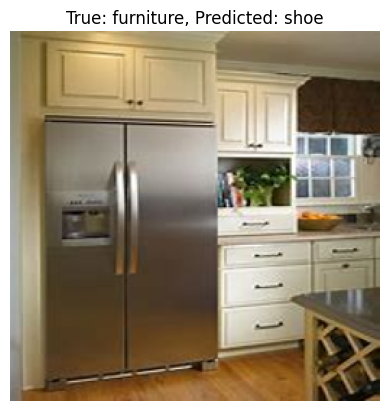

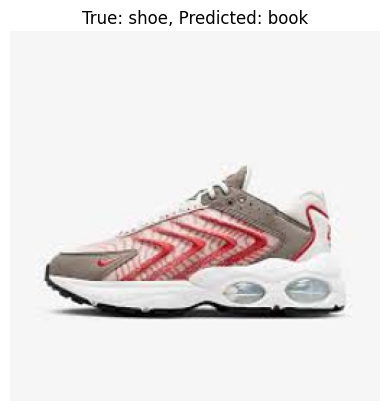

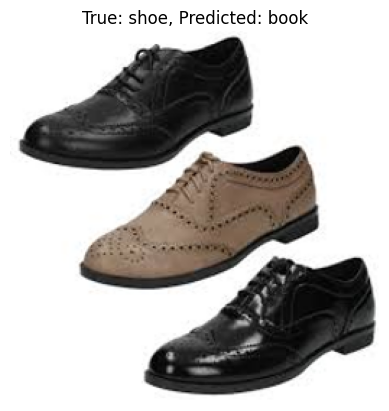

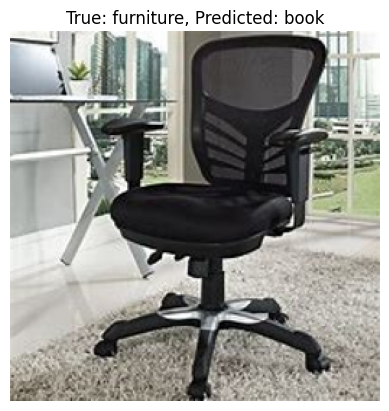

In [ ]:
test_images = np.array(test_images)
# Evaluate the trained model
predictions = baseline_cnn.predict(test_images)
predicted_labels = [classes[np.argmax(pred)] for pred in predictions]

# Calculate accuracy for the trained model
trained_accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Trained Model Accuracy: {trained_accuracy:.2f}")

# Generate and display the confusion matrix for the trained model
trained_conf_matrix = confusion_matrix(test_labels, predicted_labels, labels=classes)
trained_conf_matrix_percent = np.nan_to_num(conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100)

trained_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percent, display_labels=classes)
trained_disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Confusion Matrix for Trained CNN Model')
plt.show()

# Display some example images with predicted and true labels for the trained model
def display_trained_predictions(num_samples_to_show=5):
    """
    Display sample predictions with true labels for the trained model.

    Parameters:
    num_samples_to_show (int): Number of samples to display.
    """
    for i in range(num_samples_to_show):
        true_label = test_labels[i]
        predicted_label = predicted_labels[i]
        # Display the actual image from the array
        image = test_images[i]
        plt.imshow(image)
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

# Display some sample predictions for the trained model
display_trained_predictions()
